In [1]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import scipy
import os
import tensorflow as tf
import csv
import pandas as pd
import numpy as np
from numpy import array
import pyaudio
import sounddevice as sd
import keras
from keras.preprocessing.image import ImageDataGenerator
import noisereduce as nr

Using TensorFlow backend.
C:\Users\Gebruiker\miniconda3\envs\tensorflow\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sampling_rate = 44100
duration = 4

In [19]:
datagenTest = ImageDataGenerator()
evaluate_generator = datagenTest.flow_from_dataframe(
dataframe = pd.read_csv(r'C:\Users\Gebruiker\Desktop\Pitch-labels_GUITARS.csv'),
directory= r'C:\Users\Gebruiker\Desktop\test.png',
batch_size= 1,
target_size=(100,100),
class_mode= None,
shuffle= False,
color_mode='grayscale',
save_to_dir = r'C:\Users\Gebruiker\Desktop\generatorOutput')

Found 1 validated image filenames.


In [5]:
def generateSpectogram(wavArray = None,filePath = None): ##can either give a Ndmpy array , or path to Png file to generate Spect
    
    if(filePath == None):
        recording1dimension = []
        for array in wavArray:
            recording1dimension.append(array[0])

        spectogram = librosa.stft(np.array(recording1dimension))
        mel = librosa.feature.melspectrogram(y=np.array(recording1dimension),sr=sampling_rate,S=spectogram,n_fft=2048,hop_length=512,n_mels=128)
        mel_dB = librosa.amplitude_to_db(np.abs(mel)) 
       
    else if:
        s,sr = librosa.load(filePath)
        spectogram = librosa.stft(s)
        mel = librosa.feature.melspectrogram(y=s,sr=sampling_rate,S=spectogram,n_fft=2048,hop_length=512,n_mels=128)
        mel_dB = librosa.amplitude_to_db(np.abs(mel)) 
        
    return mel_dB


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

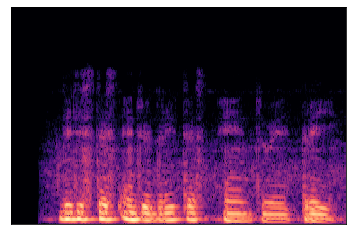

In [8]:
recording = sd.rec(samplerate=sampling_rate,frames = int(duration * sampling_rate), channels = 1,blocking= True)

## 44000 * 10s rows (440 000 rows of arrays size 1)
librosa.display.specshow(generateSpectogram(wavArray=recording))
sd.playrec(recording,channels=  2)

In [43]:
sd.playrec(recording,channels=  2)

NameError: name 'recording' is not defined

In [10]:
for i in recording:
    arrayRecording.append(i[0])

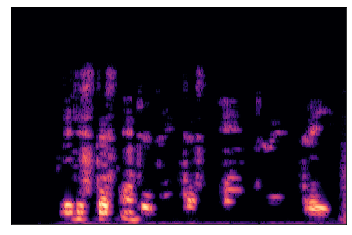

In [24]:
spectogram = librosa.stft(recording_filtered)
mel = librosa.feature.melspectrogram(y=recording_filtered,sr=sampling_rate,S=spectogram,n_fft=2048,hop_length=512,n_mels=128)
mel_dB = librosa.amplitude_to_db(np.abs(mel)) 
librosa.display.specshow(mel_dB)

In [32]:
librosa.midi_to_note(64)

'E4'

C:\Users\Gebruiker\miniconda3\envs\tensorflow\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


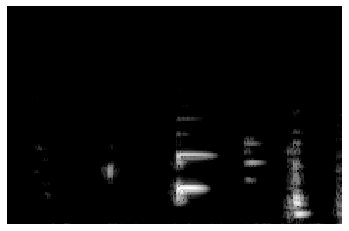

In [29]:
plt.box(0)
s_noise,sr = librosa.load(r'C:\Users\Gebruiker\Desktop\Recording (14).m4a')
s_filtered = nr.reduce_noise(audio_clip=s_noise,noise_clip=s_noise)
spectogram = librosa.stft(s_filtered)
mel = librosa.feature.melspectrogram(sr=sampling_rate,S=spectogram,n_fft=2048,hop_length=512,n_mels=128)
mel_dB = librosa.amplitude_to_db(np.abs(mel))
librosa.display.specshow(mel_dB,sr = sampling_rate,cmap = 'gray')
plt.savefig(r'C:\Users\Gebruiker\Desktop\test.png')

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

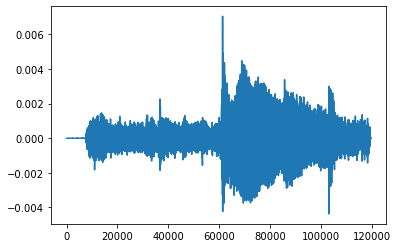

In [44]:
noise = s_noise - s_filtered
plt.plot(noise)
sd.playrec(noise,channels=2)


In [30]:
model = keras.models.load_model(r'C:\Users\Gebruiker\Desktop\modelAugmentedGenerator1.h5')

In [31]:
evaluate_generator.reset()
model.predict(evaluate_generator,steps= int((evaluate_generator.n // evaluate_generator.batch_size)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)